In [2]:
import pandas as pd

In [3]:
from matplotlib import pyplot as plt

In [4]:
from datetime import datetime, timedelta as dt

In [5]:
#Leser inn csv filen, og legger den i en variabel
ruterData = pd.read_csv("Ruter_data.csv", sep=';')

In [6]:
#Git alle kolonner mer lesbare navn
ruterData = ruterData.rename(columns={'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra': 'Faktisk_Ankomst', 'Tidspunkt_Faktisk_Avgang_Holdeplass_Fra': 'Faktisk_Avgang','Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra': 'Planlagt_Ankomst', 'Tidspunkt_Planlagt_Avgang_Holdeplass_Fra': 'Planlagt_Avgang'})

In [7]:
#Lager en ny DataFrame med de aktuelle verdiene
ruterData = ruterData.filter(items=['Faktisk_Ankomst','Planlagt_Ankomst'])

In [8]:
#Fjerne alle rader med bare : som verdi (tomme)
ruterData = ruterData[ruterData.Faktisk_Ankomst != ':']
ruterData.head()

,Faktisk_Ankomst,Planlagt_Ankomst
0,10:53:53,10:53:00
1,13:12:20,13:12:00
2,10:18:56,10:19:00
3,13:52:04,13:51:00
4,07:34:13,07:33:00


In [1620]:
#Gjør om fra datetime format til timer, minutter og sekunder
ruterData[['Faktisk_Timer','Faktisk_Minutter','Faktisk_Sekunder']] = ruterData['Faktisk_Ankomst'].str.split(':',expand=True)
ruterData[['Planlagt_Timer','Planlagt_Minutter','Planlagt_Sekunder']] = ruterData['Planlagt_Ankomst'].str.split(':',expand=True)

In [1621]:
#Gjør om string verdiene til int64
ruterData["Planlagt_Timer"] = pd.to_numeric(ruterData["Planlagt_Timer"])
ruterData["Planlagt_Timer"] = ruterData["Planlagt_Timer"].mod(24)
ruterData["Faktisk_Timer"] = panda.to_numeric(ruterData["Faktisk_Timer"])
ruterData["Faktisk_Timer"] = ruterData["Faktisk_Timer"].mod(24)

In [1622]:
#Samler timer, minutter og sekunder inn i Faktisk_Ankomst kolonnen
kolonner = ['Faktisk_Timer','Faktisk_Minutter', 'Faktisk_Sekunder']
ruterData['Faktisk_Ankomst'] = ruterData[kolonner].apply(lambda row: ':'.join(row.values.astype(str)), axis=1)
kolonner = ['Planlagt_Timer','Planlagt_Minutter', 'Planlagt_Sekunder']
ruterData['Planlagt_Ankomst'] = ruterData[kolonner].apply(lambda row: ':'.join(row.values.astype(str)), axis=1)

In [1623]:
#Lager en ny DataFrame med de aktuelle verdiene
ruterData = ruterData.filter(items=['Faktisk_Ankomst','Planlagt_Ankomst', 'Planlagt_Timer'])
ruteinterData = ruterData.rename(columns={'Planlagt_Timer': 'Timer'})

In [1624]:
#Konverterer fra String til DateTime, uten dato
ruterData["Faktisk_Ankomst"] = ruterData["Faktisk_Ankomst"].astype("datetime64")
ruterData["Planlagt_Ankomst"] = ruterData["Planlagt_Ankomst"].astype("datetime64")

In [1625]:
#ruterData = ruterData[ruterData.Faktisk_Ankomst > ruterData.Planlagt_Ankomst]

In [1626]:
ruterData['Differanse'] = (ruterData.Faktisk_Ankomst - ruterData.Planlagt_Ankomst)

In [1627]:
#ruterData['Differanse'] = ruterData['Differanse'].astype(str).str[7:15]
ruterData['Differanse'] = ruterData['Differanse'].dt.total_seconds()

In [1628]:
ruterData = ruterData.filter(items=['Timer','Differanse'])

In [1629]:
import seaborn as sns

In [1630]:
ruterData.sort_values(by=['Differanse'])

,Timer,Differanse
2379,18,"-2,585"
3269,18,"-2,523"
2255,18,"-2,522"
3941,16,"-2,479"
187,18,"-2,418"
...,...,...
2213,16,"3,130"
3484,17,"3,537"
4860,15,"7,300"
3345,16,"9,211"


In [1631]:
data = ruterData.groupby(ruterData['Timer']).mean()

In [1632]:
threshold_max = ruterData["Differanse"].quantile(0.99)
threshold_min = ruterData["Differanse"].quantile(0.01)
ruterDataDag = ruterData[(ruterData["Differanse"] < threshold_max) & (ruterData["Differanse"] > threshold_min) & (ruterData['Timer'] >= 6)]
ruterDataNatt = ruterData[(ruterData["Differanse"] < threshold_max) & (ruterData["Differanse"] > threshold_min) & (ruterData['Timer'] <= 5)]

Text(0, 0.5, 'Forsinkelse (Sekunder)')

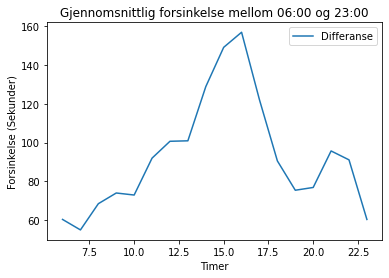

In [1633]:
ruterDataDag = ruterDataDag.groupby(ruterDataDag.Timer).mean()
forsinkelseGrafDag = ruterDataDag.plot.line(title="Gjennomsnittlig forsinkelse mellom 06:00 og 23:00")
forsinkelseGrafDag.set_xlabel("Timer")
forsinkelseGrafDag.set_ylabel("Forsinkelse (Sekunder)")

Text(0, 0.5, 'Forsinkelse (Sekunder)')

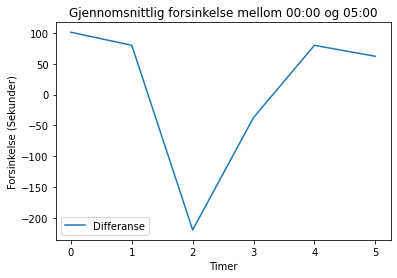

In [1634]:
ruterDataNatt = ruterDataNatt.groupby(ruterDataNatt.Timer).mean()
forsinkelseGrafNatt = ruterDataNatt.plot.line(title="Gjennomsnittlig forsinkelse mellom 00:00 og 05:00")
forsinkelseGrafNatt.set_xlabel("Timer")
forsinkelseGrafNatt.set_ylabel("Forsinkelse (Sekunder)")